In [27]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import pandas as pd
import sys
import os

path = '../AMLSim/outputs/sample'
csvList = os.listdir('../AMLSim/outputs/sample')
print(csvList)


['accountMapping.csv', 'accounts.csv', 'alert_accounts.csv', 'alert_transactions.csv', 'alert_validations.log', 'cash_tx.csv', 'individuals-bulkload.csv', 'organizations-bulkload.csv', 'resolvedentities.csv', 'sar_accounts.csv', 'transactions.csv']


In [287]:
accountMapping = pd.read_csv(os.path.join(path,csvList[8]))
accountMapping.head()

,entityrefid,entityreference,partyid1,partyid2,partyid1entitytype,partyid2entitytype,score,reason


In [288]:
accounts = pd.read_csv(os.path.join(path, csvList[1]))
accounts.head()


,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,0,C_0,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,92221.09,1,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C_1,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,87897.72,1,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,2,C_2,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,71028.58,1,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,3,C_3,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,62945.84,1,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,4,C_4,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,75563.74,1,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
transactions = pd.read_csv(os.path.join(path, csvList[-1]))
transactions.head()

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,904,963,TRANSFER,785.77,2017-01-01T00:00:00Z,False,-1
1,2,486,152,TRANSFER,524.61,2017-01-01T00:00:00Z,False,-1
2,3,707,960,TRANSFER,482.39,2017-01-01T00:00:00Z,False,-1
3,4,762,620,TRANSFER,715.38,2017-01-01T00:00:00Z,False,-1
4,5,920,982,TRANSFER,882.35,2017-01-01T00:00:00Z,False,-1


False    102861
True         59
Name: is_sar, dtype: int64


Text(0.5, 1.0, 'Data Imbalance')

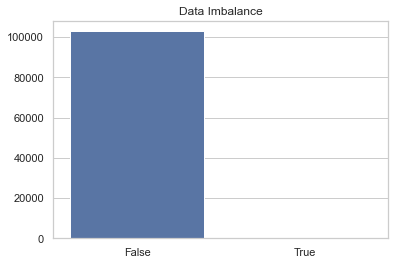

In [303]:
x = transactions['is_sar'].value_counts().index
y = transactions['is_sar'].value_counts().values
print(transactions['is_sar'].value_counts())
ax = sns.barplot(x=x, y=y)
ax.set_title('Data Imbalance')


   tran_id  orig_acct  bene_acct   tx_type  base_amt  \
0        1        904        963  TRANSFER    785.77   
1        2        486        152  TRANSFER    524.61   
2        3        707        960  TRANSFER    482.39   
3        4        762        620  TRANSFER    715.38   
4        5        920        982  TRANSFER    882.35   

             tran_timestamp  is_sar  alert_id  
0 2017-01-01 00:00:00+00:00   False        -1  
1 2017-01-01 00:00:00+00:00   False        -1  
2 2017-01-01 00:00:00+00:00   False        -1  
3 2017-01-01 00:00:00+00:00   False        -1  
4 2017-01-01 00:00:00+00:00   False        -1  


<AxesSubplot:xlabel='orig_acct', ylabel='Density'>

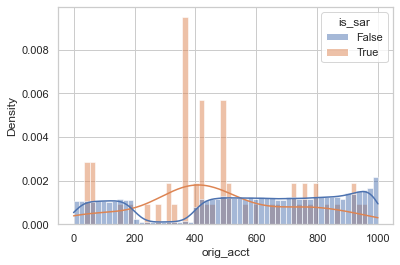

In [304]:
print(transactions.head())
sns.histplot(data=transactions, x='orig_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:xlabel='bene_acct', ylabel='Density'>

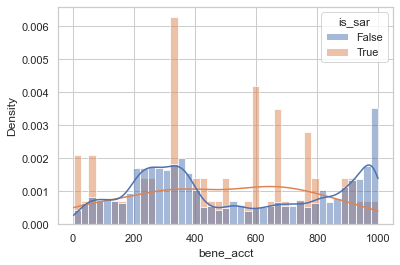

In [305]:

sns.histplot(data=transactions, x='bene_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)

<AxesSubplot:xlabel='base_amt', ylabel='Density'>

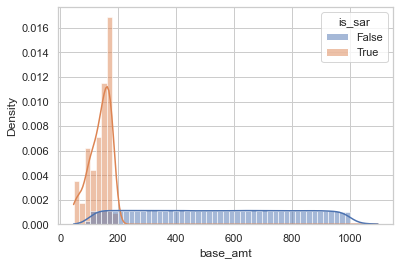

In [306]:
sns.histplot(data=transactions, x='base_amt', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:xlabel='orig_acct', ylabel='Density'>

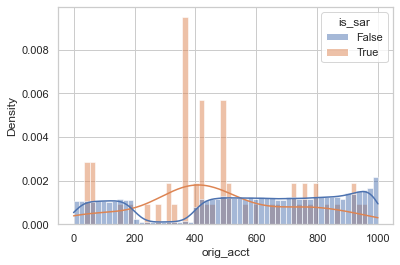

In [307]:

sns.histplot(data=transactions, x='orig_acct', hue='is_sar',
             stat='density', common_norm=False, kde=True)


<AxesSubplot:ylabel='Count'>

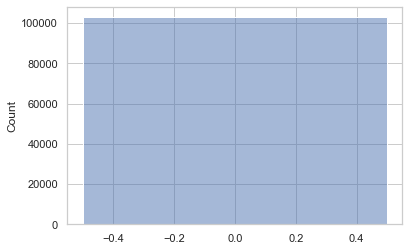

In [308]:
tx_type = pd.Categorical(transactions['tx_type'])
sns.histplot(data=tx_type.codes, kde = True)


<AxesSubplot:xlabel='tran_timestamp', ylabel='Density'>

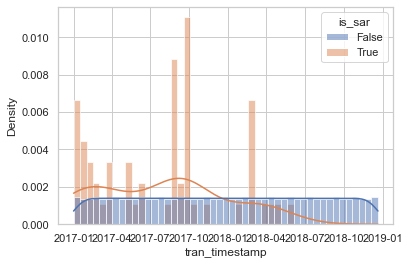

In [309]:
transactions['tran_timestamp'] = pd.to_datetime(transactions['tran_timestamp'])
sns.histplot(data=transactions, x='tran_timestamp', hue='is_sar',
            stat='density', common_norm=False, kde=True)


In [310]:
orig_acct = pd.merge(transactions, accounts, how='left', left_on=['orig_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
orig_acct.head()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,1,904,963,TRANSFER,785.77,2017-01-01 00:00:00+00:00,False,-1,904,C_904,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,70446.69,5,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,2,486,152,TRANSFER,524.61,2017-01-01 00:00:00+00:00,False,-1,486,C_486,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,70782.06,3,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,3,707,960,TRANSFER,482.39,2017-01-01 00:00:00+00:00,False,-1,707,C_707,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,93872.87,4,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,4,762,620,TRANSFER,715.38,2017-01-01 00:00:00+00:00,False,-1,762,C_762,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,55906.18,4,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,5,920,982,TRANSFER,882.35,2017-01-01 00:00:00+00:00,False,-1,920,C_920,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,84182.96,5,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='initial_deposit', ylabel='Density'>

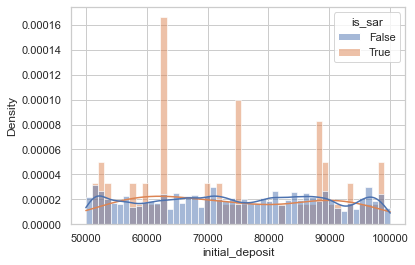

In [311]:


sns.histplot(data=orig_acct, x='initial_deposit', hue='is_sar',
            stat='density', common_norm=False, kde=True)



0         800
1         335
2         581
3         642
4         818
         ... 
102915    362
102916    893
102917     44
102918    452
102919      0
Length: 102920, dtype: int16


<AxesSubplot:xlabel='dsply_nm', ylabel='Density'>

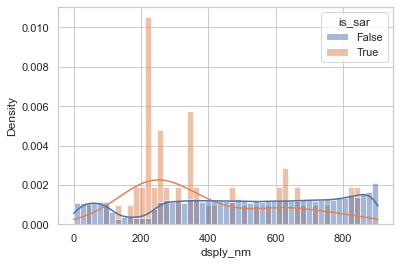

In [312]:
orig_acct['dsply_nm'] = orig_acct.dsply_nm.astype('category')
print(orig_acct['dsply_nm'].cat.codes)
orig_acct['dsply_nm'] = orig_acct['dsply_nm'].cat.codes
sns.histplot(data=orig_acct, x='dsply_nm', hue='is_sar',
             stat='density', common_norm=False, kde=True)


In [313]:
bene_acct = pd.merge(transactions, accounts, how='left',
                     left_on=['bene_acct'], right_on=['acct_id'])
pd.set_option('display.max_columns', None)
bene_acct.head()


,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id,acct_id,dsply_nm,type,acct_stat,acct_rptng_crncy,prior_sar_count,branch_id,open_dt,close_dt,initial_deposit,tx_behavior_id,bank_id,first_name,last_name,street_addr,city,state,country,zip,gender,birth_date,ssn,lon,lat
0,1,904,963,TRANSFER,785.77,2017-01-01 00:00:00+00:00,False,-1,963,C_963,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,64488.88,5,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
1,2,486,152,TRANSFER,524.61,2017-01-01 00:00:00+00:00,False,-1,152,C_152,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,52902.55,1,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
2,3,707,960,TRANSFER,482.39,2017-01-01 00:00:00+00:00,False,-1,960,C_960,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,84036.27,5,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
3,4,762,620,TRANSFER,715.38,2017-01-01 00:00:00+00:00,False,-1,620,C_620,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,58177.74,4,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN
4,5,920,982,TRANSFER,882.35,2017-01-01 00:00:00+00:00,False,-1,982,C_982,SAV,A,USD,False,1,2017-01-01T00:00:00Z,4754-11-29T00:00:00Z,87369.75,5,bank,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='initial_deposit', ylabel='Density'>

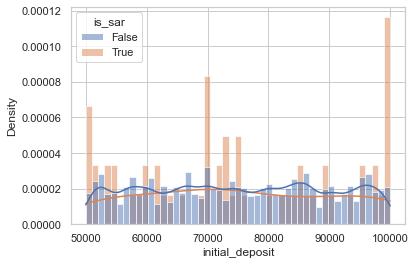

In [314]:
sns.histplot(data=bene_acct, x='initial_deposit', hue='is_sar',
             stat='density', common_norm=False, kde=True)


0         908
1          55
2         905
3         543
4         928
         ... 
102915    332
102916    769
102917    106
102918     90
102919    932
Length: 102920, dtype: int16


<AxesSubplot:xlabel='dsply_nm', ylabel='Density'>

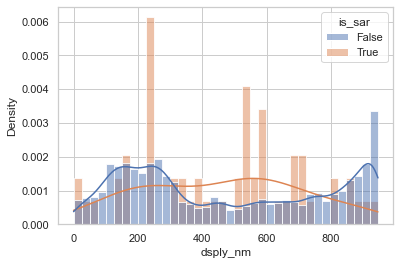

In [315]:
bene_acct['dsply_nm'] = bene_acct.dsply_nm.astype('category')
print(bene_acct['dsply_nm'].cat.codes)
bene_acct['dsply_nm'] = bene_acct['dsply_nm'].cat.codes
sns.histplot(data=bene_acct, x='dsply_nm', hue='is_sar',
             stat='density', common_norm=False, kde=True)
